# Metodos no supervisados

Algunos puntos imporantes

* Las etiquetas pueden ser costosas.
* Las etiquetas son imprecisas.
* Hay "infinidad" de datos sin etiquetas.

Vamos a ver en este curso los siguientes metodos

* Clustering (agrupamiento)
* Principal Component Analysis (PCA)
* Anomaly detection.

## Clustering.
Hay varios tipos de clusering.

* Partitioning clustering: Se parte en grupos que no se intersectan. Son excluyentes (el mas comun).
* Hierarchical (Jerarquico): Usa jerarquias en forma de arbol.
* Hay grupos que se intersectan como en el caso de "non-exclusive clustering"
* "fuzzy clustering": Se basa en probabilidades sobre los objetos.

Nosotros solo estudiamos "partitioning clustering". El metodo que usamos se llama k-means.

### k-means.
Un poco mas de clustering con el ejemplo de las casas.
Asumamos que no tenemos los precios. Que podriamos hacer con esos datos?




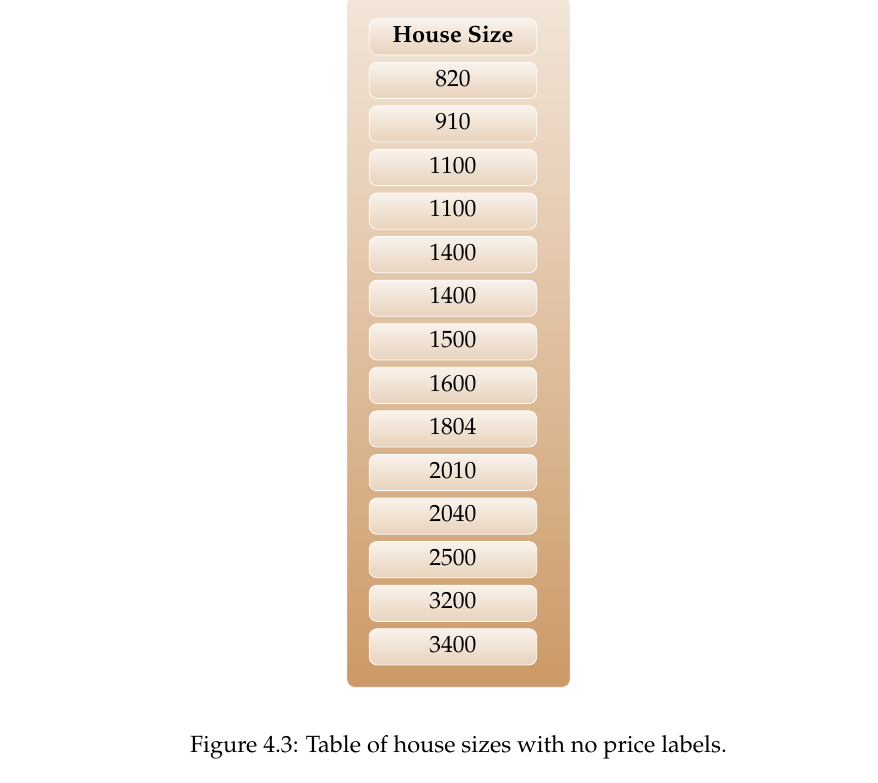

Podemos graficar los datos como puntos en una linea y observarlos.

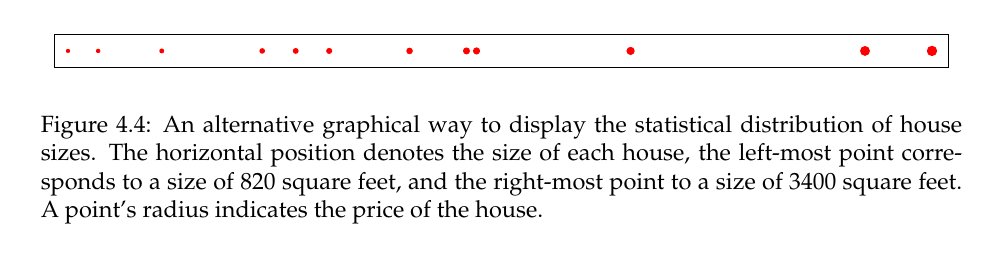

#### Un poco de historia:
El termino "k-means" fue acunhado por James McQueen en 1967 (referencia en las notas de clase). El concepto fue introducido por Hugo Steinhaus en 1956,
el algorimto como lo conocemos hoy fue presentado por Stuart Lloyd en los laboratorios Bell, en 1957.


Explicamos el algoritmo de "k"-means.

1. Decidimos el numero de "clusters" $k$. $k<m$
2. Generamos $k$ centros aleaoriamene.
3. Inicializamos un vector de enteros $c$ de $m$ elementos. Cada $c_i$ denota un indice correspondiente su grupo (de los $k$ grupos). Los centros aleatorios los llamamos $\mu_i$.
Asuma que tenemos tres clases y 8 puntos. Que el vector
$c=[1,1,2,3,1,3,2,2]$ que indica que los punos $x_1, x_2, x_5$ pertenecen al grupo con "centro" $\mu_1$.  Los puntos $x_3, x_7, x_8$ pertenecen al grupo con "cenro" $\mu_2$, y finalmentte $x_4, x_6$ pertencen  al grupo con cenro $\mu_3$.  
4.  Se reparten los $x_i$ de forma que cada $x_i$ se asigna al grupo con centro mas cercano.
5. Obtenga nuevas medias $\mu_i$, a partir de los miembros de su clase, tomando
su **promedio**.
Por ejemplo los nuevos $\mu_1, \mu_2, \mu_3$ son

\begin{eqnarray}
\mu_1 &=& \frac{x_1 + x_2 + x_5}{3} \\
\mu_2 &=& \frac{x_3 + x_7 + x_8}{3} \\
\mu_3 &=& \frac{x_4 + x_6}{2}.
\end{eqnarray}

6. Regresar al paso 4.
Cuando paramos el ciclo?

Podemos pensar en una funcion de costo

$$J(x, c, \mu) = \sum_{i=1}^m  \| x_i - \mu_{c_i} \|^2 $$
Esta expresion debe disminuir a medida que $k \to m$, si $k=m$ esta expresion es 0.


Veamos un ejemplo grafico que invente usando TikZ. Ver Figura 4.5.





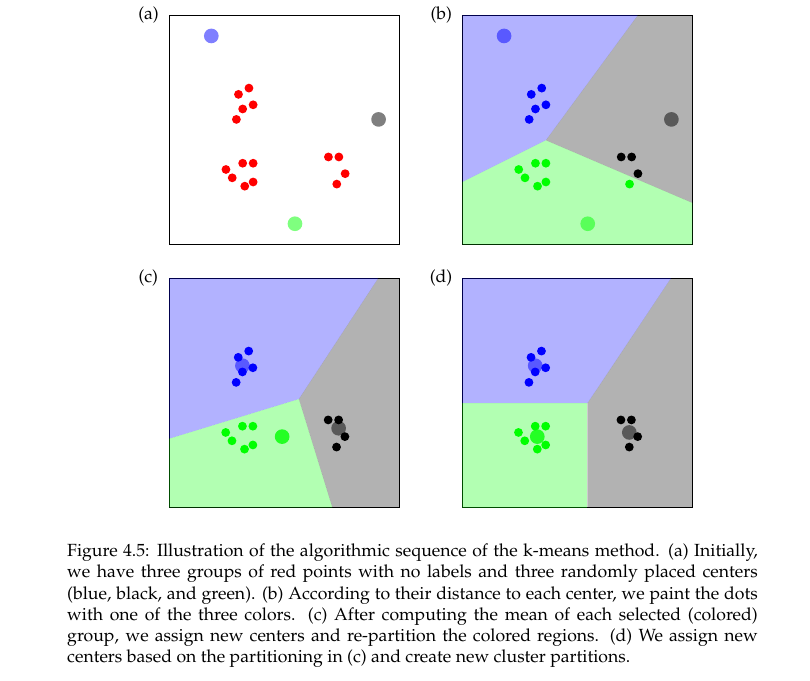

La Figura 4.6 creada en `Pyhon' (la va a generar usted en la proxima tarea.  Muestra un ejemplo de tres clusters y la forma dinamica en que los centros se mueven.

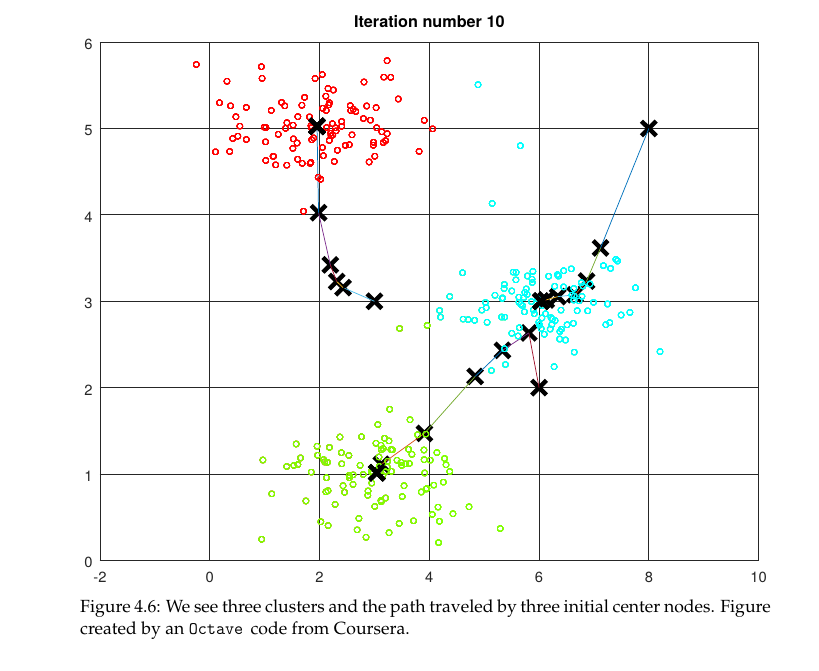

Veamos el algoritmo en la proxima Figura.

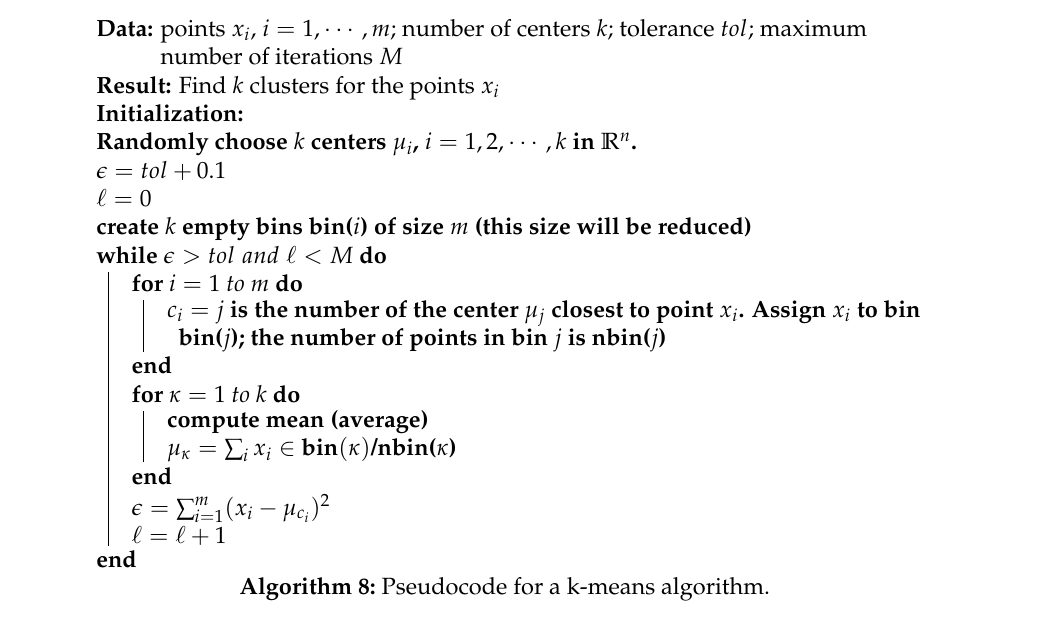

El valor $k$ es un hiperparametro. Como lo obtenemos?
Para esto debemos tener en cuenta que

1. Objetos en el mismo grupo deben ser tan parecidos como sea posible.
2. Objetos de grupos distintos, tan distintos como sea posible.

Para obtener un $k$ optimo existen varios algoritmos.

1. Metodos directos:
    * metodo del elbow (codo)
    * De la silueta (silhuette)

2. Metodos estadisticos: "gap statistic method".

El lenguaje de programacion `R`, presenta mas 30 indicadores para hallar un $k$ optimo. Python tambien tiene herramientas.

### Metodos directos para hallar un $k$ "optimo".

* **Elbow method**: Nos basmos en la grafica Figura 4.7.

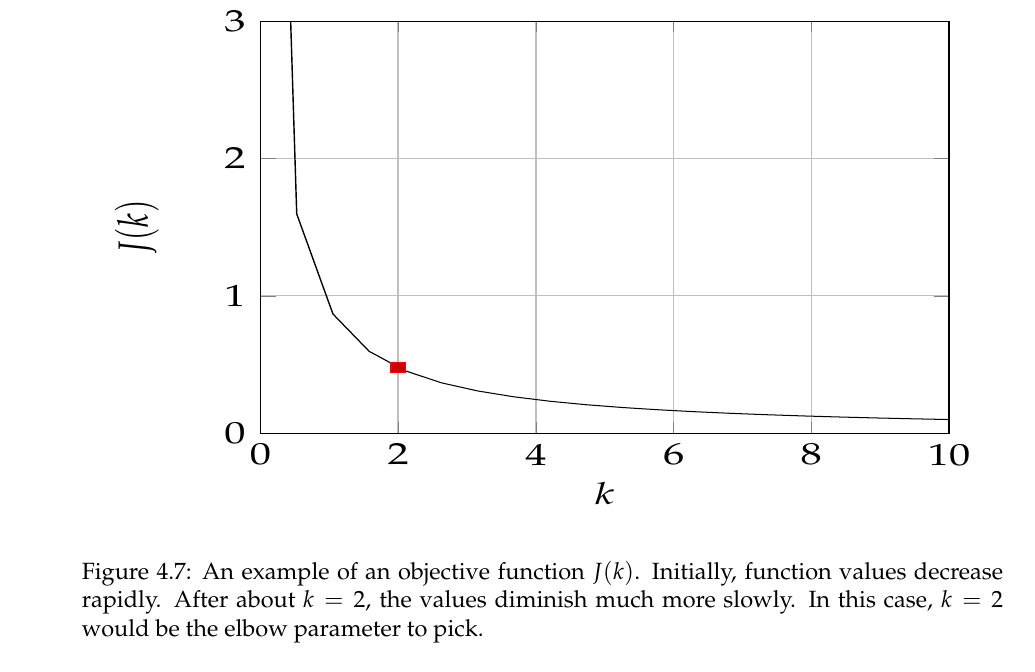

La Figura 4.7: Presenta una grafica del costo como funcion del numero de clusters. Quisiera un costo minimo, pero cuando el problema es grande, no se justifica bajar mas de cierto punto. El "codo" aparace dibjuado en $k=2$.
Tiene la caracteristica de que ya la curva se aplana. Matematicamente este seria el punto de mayor curvatura. Sin embargo, nosostros miramos este metodo de forma cualitativa.

* **The average silhouette method**: El metodo de la silueta promedio.
Este es mas cuantitativo. Explicamos  la matematica del metodo.

Sea

$$C_I = \{ x_{I1}, x_{I2}, \cdots, x_{IK_I} \}  $$
Es el cluser $I$. Las componentes las estudiamos con dos indices.
El primer indice dice en que cluster esta el punto y el segundo es el ordinal del punto.  $k_I = | C_I |$ es el numero de elementos del cluster $C_I$.

Vamos a defnir dos conceptos imporantes : **cohesion** y **separacion** de forma cuantitativa.

Pensemos en el cluste $C_I$. Para cada punto $X_{Ii}$ podemos calcular su **cohesion** ($a_{Ii}$) con la formula

$$a_{Ii} =  \frac{1 }{ |C_I| - 1} \sum_{j=1}^{k_I} d(x_{Ij}, x_{Ii}) $$
$d(x_{Ij}, x_{Ii})$ es la distancia entre los puntos $x_{Ij}$ y $x_{Ii}$.
Esta distancia puede ser Euclidiana (Pitagorica) o cualquier otro norma.
Restamos $1$ en la division por que cada punto esta a una distancia 0 de si mismo, entonces con el fin de excluir el punto mismo $x_{Ii}$.
Entre mas pequenho sea $a_{Ii}$ mas **cohesinados** estan los puntos al redededor de su centroide.

El otro concepto que queremos ver es **separacion**.
Piense en un punto $x_{iI}$, vamos a ver la distancia media a otro cluster $C_J$.  Una medida de esto es

$$\frac{1}{ k_J} \sum_{j=1}^{k_J} d(x_{Ii}, x_{Jj}) $$
$J=1,2, \cdots, I-1, I+1, \cdots , n$, asumiento $n$ clusters.

Queremos hallar un cota inferior para este conjunto. Esta cota (minimo) se da por el valor

$$b_{Ii} = \min_{J \ne I} \frac{1}{k_J} \sum_{j=1}^{k_J} d(x_{Ii}, x_{Jj}) $$

Usamos estos dos conceptos (cohesion, separacion) para definir la silueta.

$$s_{Ii} =
\begin{cases}
\frac{b_{I i} - a_{Ii}}{\max \{ a_{Ii}, b_{Ii} \} } \quad , \quad \text{si } |C_I| > 1  \\
0 \quad , \quad \text{si }  | C_I |=1.
\end{cases}  $$

Vemos que la silueta esta en el intervalo $(-1,1)$.
Es negativa cuando $b_{Ii}$ es pequenho comparado con $a_{Ii}$ lo que me indica que estamos en el cluster equivocado. Lo ideal es que $a_{Ii}$ sea mas grande que el $b_{Ii}$ y entonces la silueta es positiva.  Que $S_{Ii}=0$
indica que estamos en un borde entre dos clusters.

Podemos entonces definir un "mapping" (mapeo)

\begin{eqnarray}
s : A &\to& \mathbb{R} \\
x_{Ii} &\mapsto& s_{Ii}
\end{eqnarray}
donde $A = \cup_{I=1}^n C_I$.

La herramienta:
[Python silhouette analysis tools](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
ilustra muy bien el concepto de la silueta y comparte el codigo de forma libre.

Una vez se tiene la silueta, por cada grupo se calcula el promedio de la silueta. Se escoje el $k$ con el mayor promedio.

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


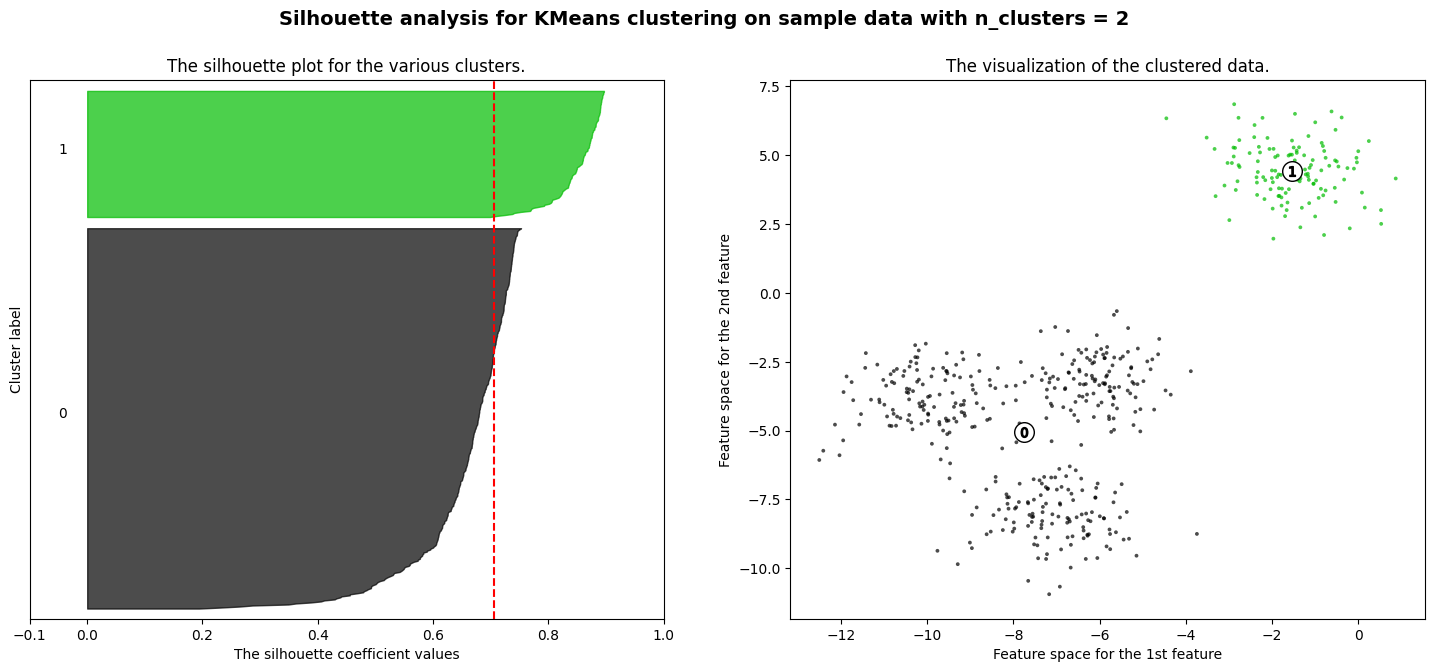

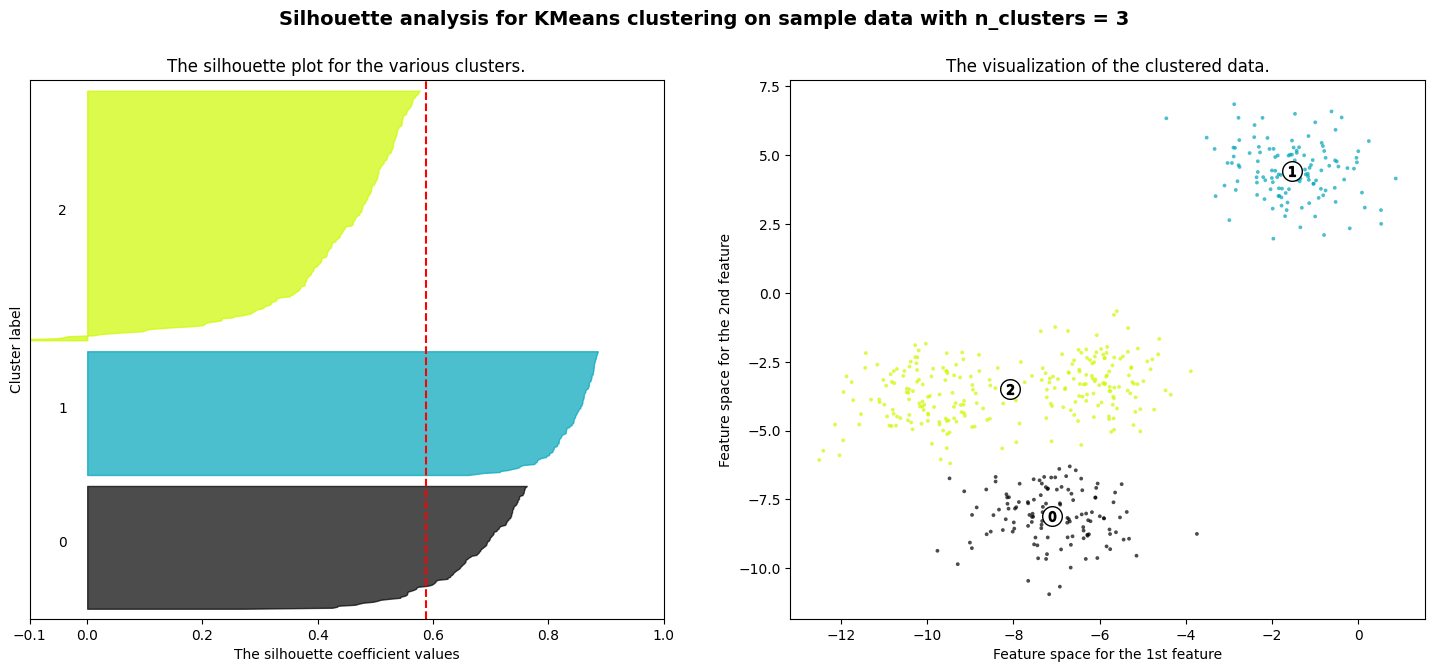

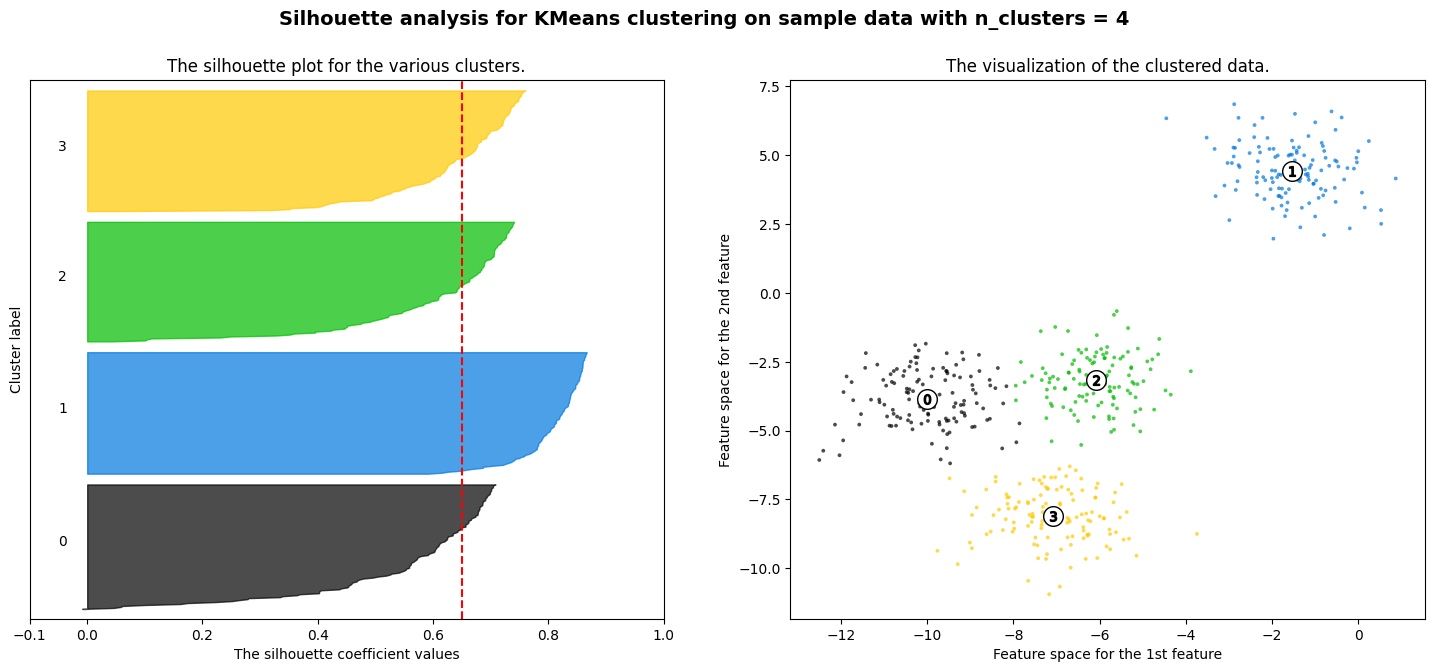

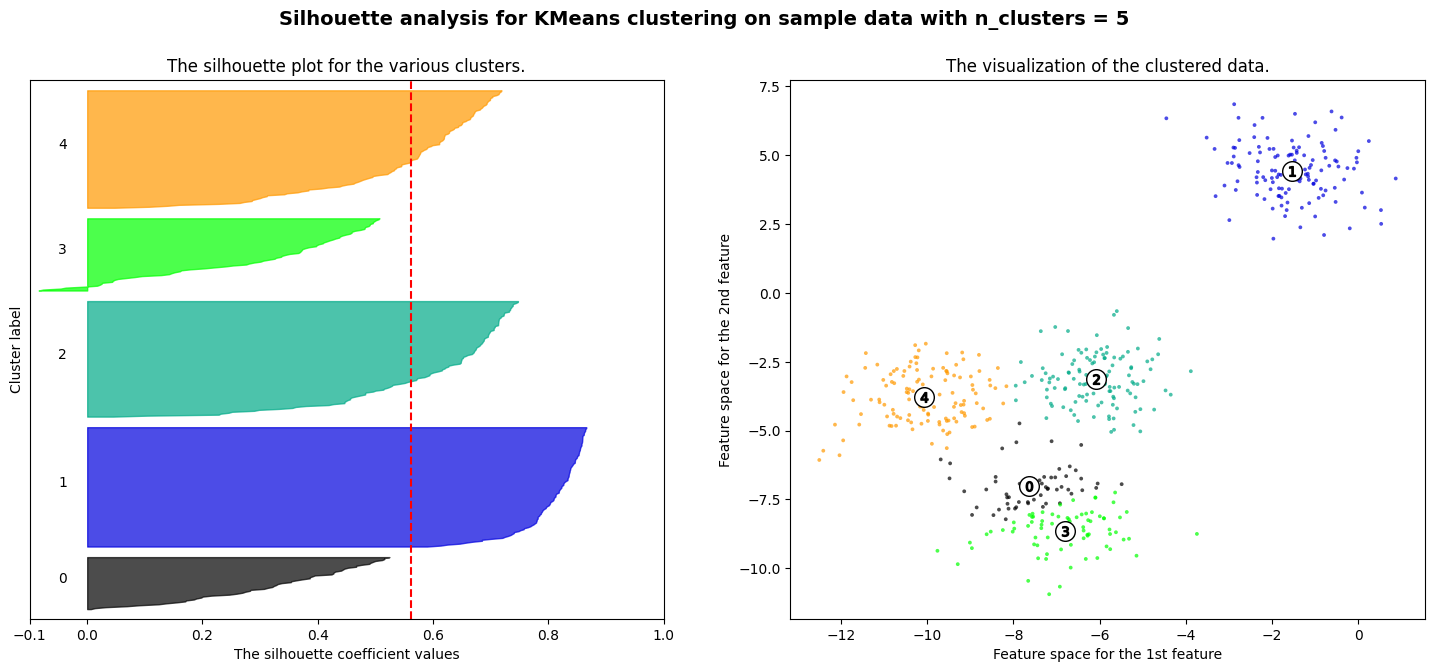

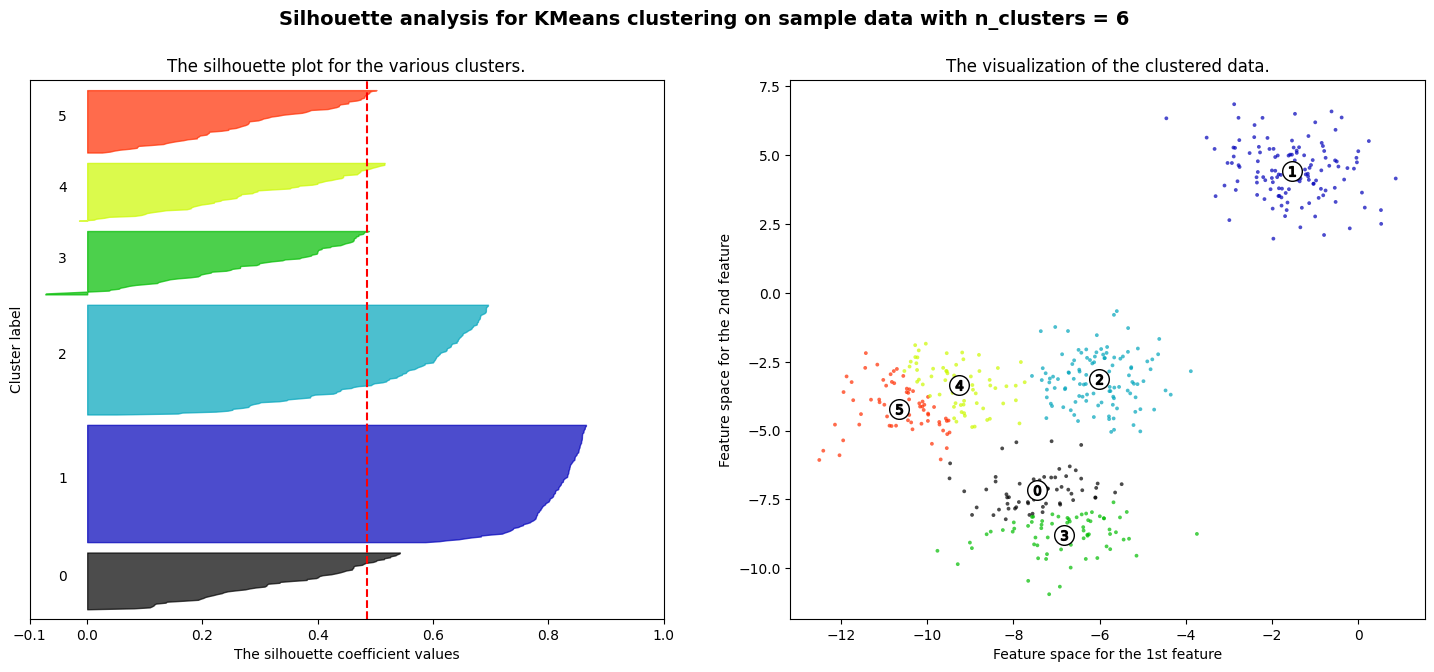

In [3]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

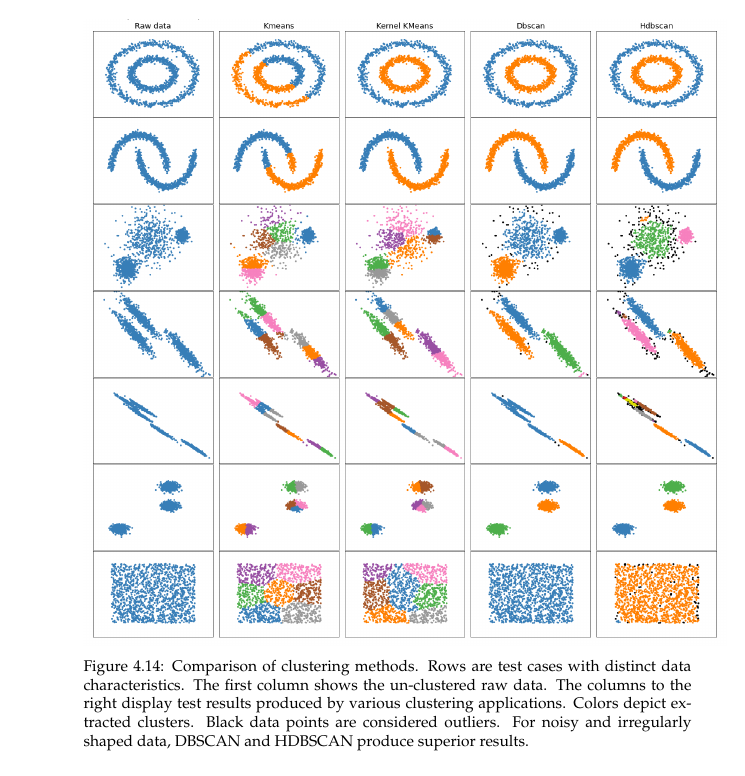

# Reduccion de Dimensionalidad
Motivaciones

* Reducir datos con el fin de transportarlos.
* Reducir datos con el fin de reducir memoria y procesamiento.
* Reducir datos a 2 dimensiones con el fin de visualizarlos.
* [La maldicion de la dimensionalidad](https://en.wikipedia.org/wiki/Curse_of_dimensionality) Revisar esto.


Como se reduce dimensionalidad?
Recuerde la formula de  proyeccion del capitulo I (Algebra lineal).
Para projectar $v$ en la direccion unitaria $u$,

$\langle v, u \rangle u = (v \cdot u) u$.

Vamos a usar la Figura 4.20 para explicar esta parte de la clase.

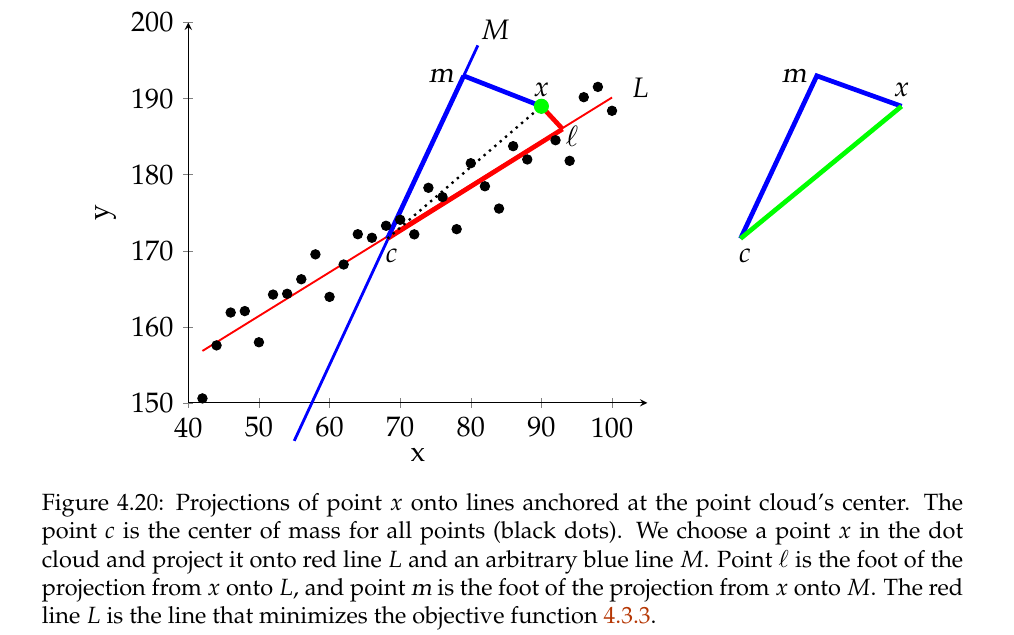

Del triangulo de verde azul, tenemos, por el Teorema de Pitagoras

$$d(x,c)^2 = d(x,m)^2 + d(m,c)^2 $$
En este momento pensemos que $c$ es la media de todos puntos (el centro geometrico).
Podemos normalizar todos puntos, restandole la media, de forma que $c=0$.

$$ \| x \|^2 = \| x - m \|^2 + \| m \|^2 \tag{1} $$

Este es el error de aproximar el vector $x$ por el vector $m$.

La perdida, de proyectar es menor cuando hallamos el minimo de

$$J_0(\theta) = \sum_{i=1}^m \| x_i - m_i \|^2 $$
donde $\theta$ es la pendiente de la linea, $x_i$ son los puntos origintales
y $m_i$ son las proyecciones. $x_i$ no cambia, como funcion de $\theta$.
de forma que, de la Ecuacion  (1)

$$\| x_i - m_i \|^2  + \| m_i \|^2 $$
tampoco cambia.  Hay un "trade off" (compromiso) entre
$\| x_i  - m_i \|^2$ y $ \| m_i \|^2$. Si la suma es constante (como funcion de $\theta$) entonces cuando hacemos $\| x_i - m_i \|^2$ pequenho es igual
a hacer $\| m_i \|^2$ grande.  Esto nos lleva escribir otra funcion objetivo.

$$J(\theta) = \sum_{i=1}^m \| m_i \|^2  \tag{2}$$
La nueva funcion objetivo $J(\theta)$ debe ser **maximizada**, sobre todos
los angulos $\theta$.

[ver la esta animacion por un minuto](https://drive.google.com/file/d/1Uv5_PXDJ-KRV7qZMqZzdOs1jzblcTipq/view)
Esta animacion es creada con un codigo
[en Matlab](https://gist.github.com/anonymous/7d888663c6ec679ea65428715b99bfdd#file-pca_animation-m).

Que tiene que ver esto con SVD?

Construiimos la matriz de datos

$$X = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{pmatrix} $$

La proyeccion $m_i$ de $x_i$ con direccion $u_i$ esta dada por

$$m_i = ( x_i \cdot u) u $$
$$ \| m_i \|^2 = (x_i \cdot u)^2 \tag{3} $$
De (2) y (3) tenemos que

$$J(\theta) = \| X u \|^2= u^T X^T X u. \tag{4} $$

La matriz $A = X^T X$ se llama la matriz de **covarianza de los datos**.

Maximizar $J(\theta)$ es maximizar (4). Ahora bien, (4) es el cociente de Rayleigh de $A=X^T X$ y que el maximo de este cociene coincide con el maximo de los autovalores $\lambda_1$ de $A$. Veamos una ilustracion.




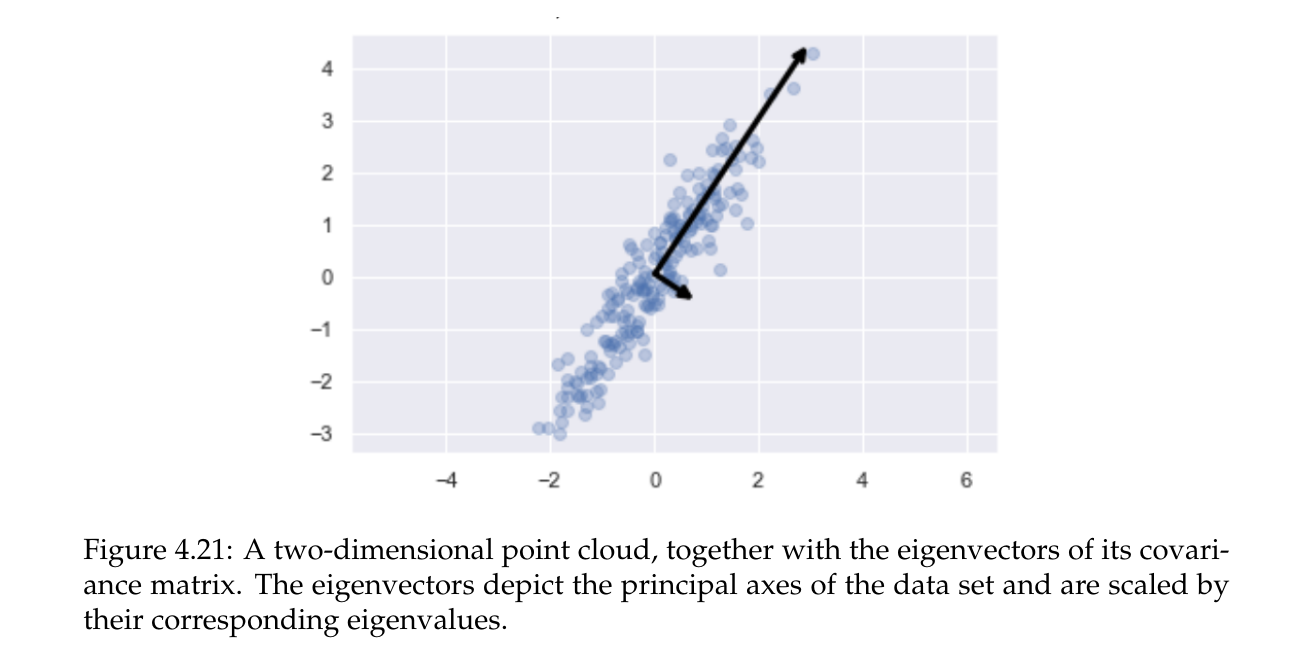

El eje mayor de la "ellipse"  esta en la direccion del autovector correspondiente a $\lambda_1$.
Es decir

$$\max_\theta J(\theta) = \lambda_1 $$

### El metodo de las componentes principales PCA(Principal Component Analysis).
Recuerde del teorema de SVD que $X=U\Lambda V^T$. Entonces

$$X^T X = (V \Lambda^T U^T) ( U \Lambda V^T) = V \Lambda^2 V^T $$

La matriz $\Lambda$ tiene los autovalores de $X^T X$ y ellos contribuyen a la descomposicion de los datos en el espacio de los autovectores. Un autovalor 0 no tiene contribucion y un autovalor grande si la tiene.  Los autovalores (diagonal de $\Lambda$) estan en orden, de mayor a menor. Se pueden truncar, a partir de un umbral , de forma que $\lambda_k$ es el ultimo y de ahi para alla los demas son 0.

Entonces construimos una nueva matriz
$$W = [V_1 | V_2 | \cdots | V_k ] \quad , k < n $$
Entonces projectamos los datos $x_i$ a este espacio de $k < n$ dimensiones. Nos ahorramos $n - k$ dimensiones.

El tamanho de cada proyeccion es $z_{ji} = \langle x_j, v_i \rangle $
$j=1, \cdots, m, i = 1, \cdots, k$
Matricialmente tenemos

$$Z = X W $$
donde
$$ Z  \quad, \quad \text{son los datos comprimidos} $$
$$ W  \quad, \quad \text{es $V$ truncada a $k$ columnas} $$
$$ X  \quad , \quad \text{son los datos originales }

### Como recuperamos los datos originales. Si se pueden, con error.
La recuperacion esta dada por

$$X_{rec} = Z W^T $$

Note que

$$X_{rec} = X W W^T $$
Si $W=V$ como $W W^T =I$ entonces $X_{rec} = X$.
Si los autovalores de $X^T X$ son muy pequenhos a partir de $\lambda_k$, es decir, $\lambda_{k+1}, \lambda_{k+2}, \cdots, \lambda_{n} \ll 1$
el error de la aproximacion es muy pequenho.

El algoritmo es como sigue:

* **Parte I** Reduccion de dimensionalidad:
    * Tome los datos de entrada $x_i$, y construya la matriz $X$ con sus filas.
    * Calcule SVD en $X$
    * Estudie los autovalores de $X^T X$, que son los $\sigma_i^2 = \lambda_i^2$. Estan ordenados de mayor a menor. Escoja un umbral, a partir del cual $\lambda_j \ll 1$ con $j > k$.
    * Construya la matriz
    $$W = [V_1 | V_2 | \cdots | V_k ]  $$
    * **Proyecte** $X$ a al espacio generado por $W$,
    $$ Z = X W $$

    $Z$ son los datos comprimidos.

* **Parte II**: Descompresion
    * Backproject (proyecte 'hacia atras')
    $$ X_{rec} = Z W^T$$

# Como escoger $k$?
Necesitamos ciertos conceptos.

* **Average squared projection error** (error de proyeccion cuadrado promedior).
Si $x^{(i)}_{approx}$  es la muestra proyectada contra $x^{(i)}$ la muestra original. Este error es

$$\epsilon = \frac1m \sum_{i=1}^m  \| x^{(i)}- x^{(i)}_{approx} \|^2 $$
Podriamos pensar en una tolerancia para este error.

* **Porcentaje promedio de la proyeccion cuadrada con respecto a la variacion total**

La variacion total de los datos esta dada por

$$\text{Tot}_{\text{var}}  = \frac1m \sum_{i=1}^m \| x^{(i)} \|^2$$
pensemos esto como la **varianza** de los datos. Asumimos que la media es 0$, sino los normalizamos (restandole la media).
La formaula para este numeral es

$$\frac{\epsilon}{ \text{Tot}_{\text{var}}} =
 \frac{\frac1m \sum_{i=1}^m  \| x^{(i)}- x^{(i)}_{approx} \|^2}{
\frac1m \sum_{i=1}^m \| x^{(i)} \|^2
 }  \le 0.01
 $$
 error relativo menor que el $1\%$.

 * **Relative accumulated sum of singular values**: Esta esta dada por

 $$\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} $$

 Hay un resultado interesnate (no lo probamos, es un ejercicio) y es la varianza (ignorando una constantte multiplicativa) es igual a la suma de los valores singulares al cuadrado.

 $$\sum_{i=1}^m \| x^{(i)} \|^2 = \sum_{i=1}^n \sigma_i^2 $$

 La matriz de SVD (la diagonal) tendria el error a partir de $\sigma_{k+1}$.
 En forma matricial este error es


 \begin{eqnarray*}
      \begin{pmatrix}
        0 & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & 0 \\
        \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
        \vdots & \ddots & 0 & \ddots & \vdots & \vdots & \vdots & \vdots  \\
        \vdots & \cdots & 0  & \sigma_{k+1} & 0 & \cdots & \cdots & \vdots \\
        \vdots & \cdots & \cdots & 0 & \sigma_{k+2} &  0 & \cdots & \vdots \\
        \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
        \vdots & \ddots & \ddots & \ddots & \ddots & 0 & \sigma_{n-1} & 0 \\
        0 & \cdots & \cdots & \cdots & \cdots & \cdots & 0 & \sigma_n
      \end{pmatrix} .
    \end{eqnarray*}


Tenemos

$$\sum_{i=1}^m \| x^{(i)} - x_{approx}^{(i)} \|^2  = \sum_{i=k+1}^{n} \sigma_i^2 $$

Entonces

$$\sum_{i=1}^m \| x^{(i)} - x_{approx}^{(i)} \|^2  = \sum_{i=n}^{n} \sigma_i^2 - \sum_{i=1}^k \sigma_i^2 $$

Entonces

$$\frac{\epsilon}{ \text{Tot}_{\text{var}}} =
 \frac{\frac1m \sum_{i=1}^m  \| x^{(i)}- x^{(i)}_{approx} \|^2}{
\frac1m \sum_{i=1}^m \| x^{(i)} \|^2
 } = \frac{\sum_{i=n}^{n} \sigma_i^2 - \sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} = 1 - \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2}
   \le 0.01
 $$

Tambien puede hacer una inspeccion grafica para hallar $k$

Investigar applicaciones.

# Proxima Clase: Deteccion de Anomalias.
